In [48]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [49]:
#importando base de dados
data = load_breast_cancer()
X, y = data['data'], data['target']
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [50]:
#divisão da base para teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
# add classificador
clf = LinearSVC() 
clf.fit(X_train,y_train)

LinearSVC()

In [52]:

clf.score(X_train, y_train)

0.967032967032967

**Usando SHAP para analisar a previsão**

In [53]:
#criação do modelo SHAP
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10))

Extraindo valores:

In [54]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

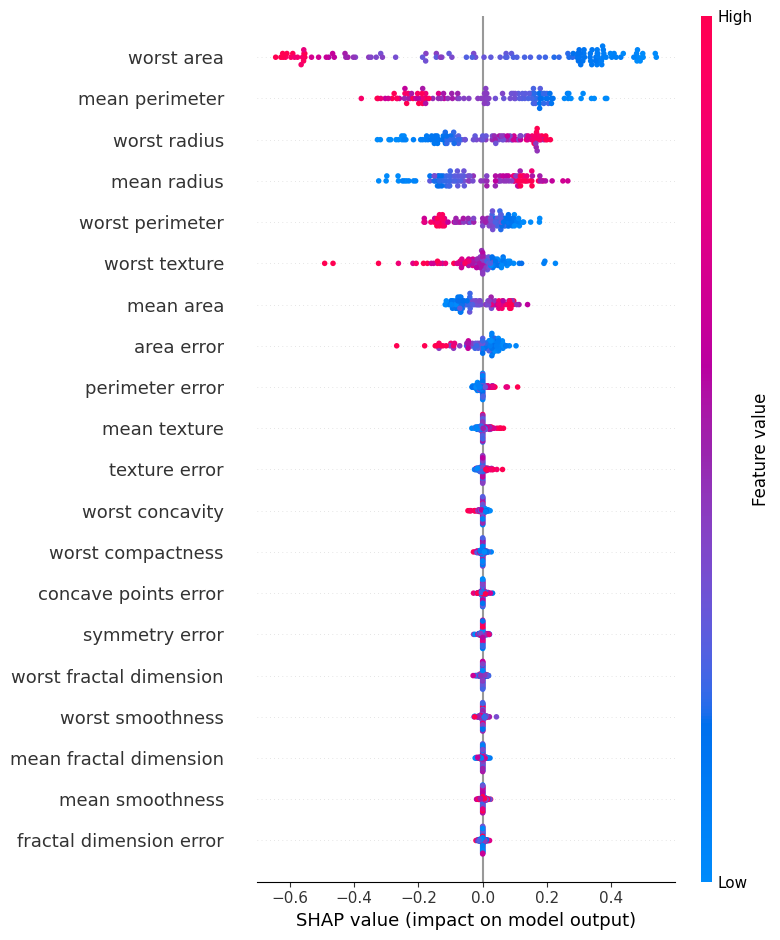

In [55]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

**Visualizando contribuições de um único registro**

In [56]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2], X_test[2],feature_names=data['feature_names'])

**Features Importance**

In [57]:
#cálculo da importancia
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

In [59]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_abs_shap_values)
sorted_feature_importance = sorted(feature_importance,key=lambda x: x[1], reverse=True)

In [60]:
for feature, importance in sorted_feature_importance: 
    print(feature,':',importance)

worst area : 0.347829384581919
mean perimeter : 0.17378906655535467
worst radius : 0.12798717388686284
mean radius : 0.11978114448137166
worst perimeter : 0.07919888469565384
worst texture : 0.06360879766785428
mean area : 0.059898722835344545
area error : 0.04739739357286442
perimeter error : 0.013894237325720048
mean texture : 0.012290351891620577
texture error : 0.009877040450033321
worst concavity : 0.007628201630879627
worst compactness : 0.006209022755563501
concave points error : 0.005524973450421655
symmetry error : 0.005511525266143038
worst fractal dimension : 0.005482740270366128
worst smoothness : 0.005466181271858005
mean fractal dimension : 0.005359990261443557
mean smoothness : 0.0052807737612503465
fractal dimension error : 0.005261569468675403
worst concave points : 0.005071166325412607
smoothness error : 0.004974684359504378
worst symmetry : 0.004940507800813454
mean concave points : 0.004733000905015778
compactness error : 0.004686482443234637
mean compactness : 0.00